# Москва на вкус: анализ заведений и рекомендации для инвесторов

## Цели и задачи проекта
Целью этого проекта является проведение исследовательского анализа рынка заведений общественного питания в Москве, чтобы помочь инвесторам из фонда Shut Up and Take My Money выбрать оптимальное место, формат и ценовую категорию для их будущего заведения. Для этого необходимо изучить текущую ситуацию на рынке, определить популярные форматы заведений, исследовать их распределение по районам и выявить ключевые закономерности, влияющие на успешность бизнеса.

## План работы

Работа начнётся с загрузки и знакомства с данными, чтобы понять их структуру, проверить на наличие пропусков, дубликатов и ошибок, а затем объединить два датасета в один. После этого будет проведена предобработка данных: приведение типов к нужному формату, обработка пропусков, удаление дубликатов и добавление новых переменных, таких как признак круглосуточной работы заведения.

Затем последует исследовательский анализ, в ходе которого будет изучено распределение заведений по категориям и районам, определено соотношение сетевых и несетевых объектов, проанализированы количество посадочных мест и рейтинги. Также будет выявлено, какие заведения чаще всего становятся частью сетей, как распределяются рейтинги по категориям, какие факторы могут на них влиять, а также какие заведения являются самыми популярными в Москве.

## Описание данных:

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках.

У нас есть два файла с данными:

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
* `name` — название заведения;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
-0 — заведение не является сетевым;
-1 — заведение является сетевым.
* `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## **Шаг 1. Загрузка данных и знакомство с ними**
Начнем с загрузки библиотек и датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_df` и `price_df`.

In [8]:
# Импортируем библиотеки для работы с данными 
import pandas as pd

# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [9]:
# Выгружаем данные в переменные 
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `/datasets/rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [11]:
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [12]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `/datasets/rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

**После первичного анализа данных можно сделать следующие выводы:**

* Названия столбцов не нужно приводить к snake case, так как все буквы уже находятся в нижнем регистре и столбцы названы одним словом.
* Только три столбца содержат числовые данные. Все значения хранятся в корректных типах данных, однако столбец `chain` содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
* Пропуски содержатся только в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
* Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Аналогичным образом познакомимся с данными датасета `/datasets/rest_price.csv`

In [19]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [21]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `/datasets/rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о ценах в заведениях общественного питания.

**После первичного анализа данных можно сделать следующие выводы:**

* Названия столбцов уже приведены к snake case.
* Только два столбца содержат числовые данные. Все значения хранятся в корректных типах данных.
* Пропуски содержатся только в столбцах во всех столбцах за исключением столбца `id`
* Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Поскольку из задачи нам известно что информация в датасете могла быть добавлена пользователями или найдена в общедоступных источниках, пропуски не вызывают много подозрений, однако нам стоит брать их во внимание при последующем анализе

#### Подготовка единого датафрейма

Поскольку задание подразумевает полный анализ данных по всем заведениям, мы соеденим нади датасеты в один датафрейм для того чтобы упростить работу в дальнейшем, так как мы проводим анализ по заведениям а не по ценам, соединять мы будем сохраняя все значения из датасета  `/datasets/rest_info.csv`

Соединим данные, используя значение параметра `how` = `'left'`. Это позволит соединить датафрейм `price_df` к `rest_df` и не потерять данные из `rest_df`

In [25]:
#Соединяем данные
df = rest_df.merge(price_df, on = 'id', how = 'left')

In [27]:
#Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные соеденены и вся информация о заведениях общественного питания сохранилась 

## Шаг 2. Предобработка данных

### Оптимизируем типы данных

Тут не так много работы, так как только столбец `chain` нуждается в преобразовании типа данных, поскольку данных не так много, это необязательный шаг, но мы можем его выполнить для оптимизации

Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'`:

In [32]:
df['chain'] = pd.to_numeric(df['chain'], downcast = 'integer')

In [34]:
# Проверим типы данных после оптимизации
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Этот шаг выполнен и можно двигаться дальше

### Работа с пропусками

При первичном анализе мы обнаружили пропуски в нашем датафрейме. Вычислим абсолютные и относительные значения пропусков в датафрейме:

In [38]:
missing_data = df.isna().sum()
missing_share = df.isna().sum() / len(df) * 100
missing_all = pd.DataFrame({f'Пропуски (абс.)': missing_data, f'Пропуски (%)': missing_share})
missing_all = missing_all.sort_values(by='Пропуски (абс.)', ascending=False)
missing_all

,Пропуски (абс.),Пропуски (%)
middle_coffee_cup,7871,93.635498
middle_avg_bill,5257,62.538663
price,5091,60.563883
avg_bill,4590,54.603854
seats,3611,42.957411
hours,536,6.376398
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000


**Промежуточный вывод после изучения пропусков**

Мы уже упоминали, данные брались из открытых источников или добавлялись вручную, можно предположить что природа пропусков - технические ошибки или ошибки ручного ввода, вероятно на этапе сбора или импорта часть данных потерялась.

Мы могли бы поставить "заглушки" и заменить все пропуски аномальными значениями или медианой, но так как в будущем мы будем строить матрицу корреляций и коробку с усами (boxplot), эти аномальные значения могут испортить наш анализ. 
К тому же, основываясь на задачах и описании данных, эти пропуски не критичны для нашего анализа

Было принято решение оставить пропуски как есть и работать с этими данными

### Работа с дубликатами 


#### Неявные дубликаты

Давайте рассмотрим уникальные записи в столбцах для выявления неявных дубликатов

In [43]:
# Выявляем неявные дубликаты связанные с опечатками или разным способом написания
unique_category = df['category'].unique()
unique_district = df['district'].unique()
f'Уникальные категории: {unique_category}, Уникальные названия районов: {unique_district}'

"Уникальные категории: ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'\n 'булочная' 'столовая'], Уникальные названия районов: ['Северный административный округ'\n 'Северо-Восточный административный округ'\n 'Северо-Западный административный округ'\n 'Западный административный округ' 'Центральный административный округ'\n 'Восточный административный округ' 'Юго-Восточный административный округ'\n 'Южный административный округ' 'Юго-Западный административный округ']"

В названиях категорий и районов нет дублирующихся записей, все написано правильно и без опечаток. Но мы еще должны проверить дубликаты в названии и адресах заведений, но тут у нас большие данные и мы не сможем выявить их на глаз. Давайте подсчитаем уникальные значения пар "Название - Адрес"

In [61]:
# Приведем название и адреса к нижнему регистру, уберем пробелы 
name_clean = df['name'].str.lower().str.strip()
address_clean = df['address'].str.lower().str.strip()

# Высчитываем уникальные пары "Название - Адрес"
df ['name_address'] = name_clean + ' ' + address_clean
unique_name_address = df ['name_address'].nunique()

f'Количество уникальных пар "Название - Адрес": {unique_name_address}'

'Количество уникальных пар "Название - Адрес": 8402'

В датасете всего 8402 уникальные пары "Название - Адрес". В датасете всего 8406 строк, что говорит нам о неявных дубликатах связаных с разностью написания

In [64]:
# Удалим все дублирующиеся пары Название - Адрес
df = df.drop_duplicates(subset=['name_address']).reset_index(drop = True)

# Проверяем количество строк в итоговом датасете
len(df)

8402

Все неявные дубликаты удалены (4 строки), можем продолжать дальнейший анализ 

#### Явные дубликаты

Давайте узнаем, есть ли в наших данных явные дубликаты

In [68]:
# Выводим количество дубликатов:
duplicate_values = df.duplicated()
duplicate_values.sum()

0

Явные дубликаты не найдены, можем приступать к следующему шагу

### Определение заведений с круглосуточным режимом работы 

Добавим новый столбец в наш датафрейм, который будет говорить о том, работает ли заведение круглосуточно или нет. `True` - заведение работает круглосуточно, `False` - заведение не работает 24/7

Давайте проверим все уникальные значения в столбце `hours`

In [73]:
df['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [75]:
# Добавим новый столбец
def is_24_7(hours):
    return 'ежедневно' in hours.lower() and 'круглосуточно' in hours.lower()

# Применяем функцию к новому столбцу
df['is_24_7'] = df['hours'].fillna("").apply(is_24_7)

# Подсчитаем сколько заведений работает круглосуточно
df['is_24_7'].sum()

730

In [77]:
#Выведем первые пять строк датафрейма с новым столбцом для проверки:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,name_address,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,"wowфли москва, улица дыбенко, 7/1",False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,"четыре комнаты москва, улица дыбенко, 36, корп. 1",False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,"хазри москва, клязьминская улица, 15",False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,"dormouse coffee shop москва, улица маршала фед...",False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,"иль марко москва, правобережная улица, 1б",False


Готово, теперь в нашем датасете содержится информация о том, работает ли заведение круглосуточно или нет

Мы загрузили и подготовили данные к анализу. В ходе предобработки было выяснено что все данные соответствуют описанию, мы узнали количество дубликатов, пропусков а также добавили новый столбец с информацией о том, является ли заведение круглосуточным.

Теперь мы можем приступать к анализу данных.

## Шаг 3. Исследовательский анализ данных

### Анализ категорий заведений и их распределение

Давайте рассмотрим представленные категориии заведений и сколько заведений представлено в каждой из них: 

In [84]:
# Смотрим распределение по категориям
df['category'].value_counts()

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `category`:

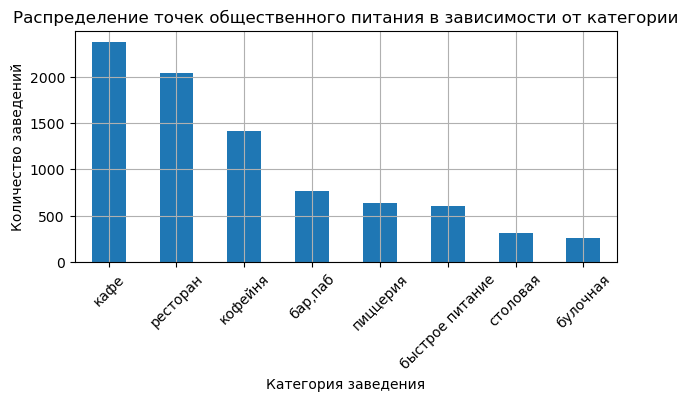

In [87]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
df['category'].value_counts().plot(
    kind = 'bar',
    legend = False,
    title = 'Распределение точек общественного питания в зависимости от категории',
    rot = 45
)

# Настраиваем оформление графика
plt.grid()
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.show()

Мы видим что всего у нас представлено 8 категорий, самые популярные - кафе (2378), рестораны (2043) и кофейни (1413). Наименее популярные категории - булочные (256) и столовые (315)

### Анализ заведений по административным округам

Давайте рассмотрим заведения в зависимости от административных округов, в которых они находятся:

In [91]:
df['district'].value_counts()

district
Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

Как мы видим, у Центрального административного округа большой отрыв и он является самым популярным среди всех округов - 2242 заведения. А наименее популярный - Северо-Западный административный округ - всего 409 заведений.

В остальном заведения распределены равномерно - около 800 точек на округ. 

Построим визуализацию чтобы четче видеть отрывы и распределение данных по округам:

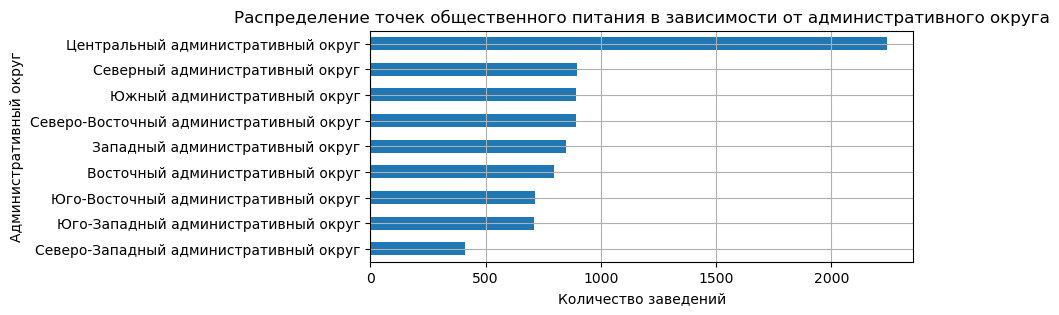

In [94]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
df['district'].value_counts().sort_values(ascending=True).plot(
    kind = 'barh',
    legend = False,
    title = 'Распределение точек общественного питания в зависимости от административного округа',
    rot = 0
)
plt.grid()

# Настраиваем оформление графика
plt.ylabel('Административный округ')
plt.xlabel('Количество заведений')
plt.show()

Теперь четко видно отрыв Центрального административного округа по сравнению с другими регионами.

Давайте рассмотрим его поближе, а также узнаем какие категории популярны внутри Центрального административного округа

In [97]:
# Отфильтруем данные, оставив только те строки которые принадлежат Центральному административному округу
df[df['district'] == 'Центральный административный округ'].groupby('category')['id'].count().sort_values(ascending = False)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64

Как мы видим, в отличие от всех округов в целом, где преобладала категория "кафе", конкретно в Центральном городском округе самая популярная категория это "ресторан".

Давайте визуализируем и посмотрим наглядно:

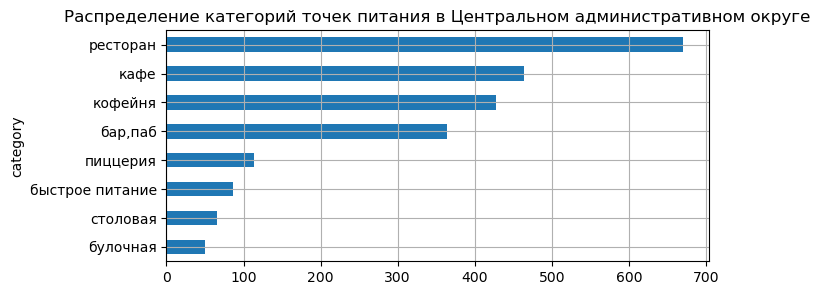

In [100]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим визуализацию
df[df['district'] == 'Центральный административный округ'].groupby('category')['id'].count().sort_values(ascending = True).plot(
    kind = 'barh',
    legend = False,
    title = 'Распределение категорий точек питания в Центральном административном округе',
    rot = 0
)
plt.grid()
plt.show()

Действительно, у ресторанов в этом регионе достаточно большой отрыв от других категорий. Но самые непопулярные так и остались - булочная и столовая

### Анализ сетевых и несетевых заведений

Давайте посмотрим сколько заведений являются сетевыми

In [104]:
# Группируем данные в зависимости от того, является ли заведение сетевым 
absolute_value = df.groupby('chain')['id'].count()

# Добавляем относительные величины
percentage = df['chain'].value_counts(normalize=True) *100
absolute_value, percentage

(chain
 0    5199
 1    3203
 Name: id, dtype: int64,
 chain
 0    61.878124
 1    38.121876
 Name: proportion, dtype: float64)

Как можно заметить, несетевых заведений гораздо больше чем сетевых. 62% против 38%, для наглядности посмотрим на график:

<Figure size 700x300 with 0 Axes>

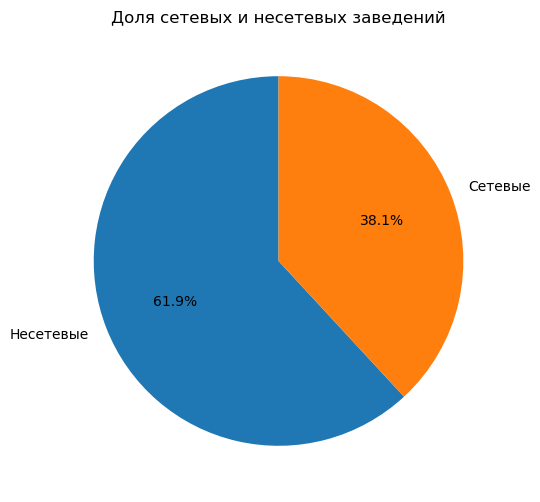

In [107]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Считаем процентное соотношение
chain_percentage = df['chain'].value_counts(normalize=True) * 100  

# Определяем подписи для категорий
labels = ['Несетевые', 'Сетевые']

# Строим круговую диаграмму
plt.figure(figsize=(6, 6))  
plt.pie(chain_percentage, labels=labels, autopct='%1.1f%%', startangle=90)

# Добавляем заголовок
plt.title('Доля сетевых и несетевых заведений')

# Показываем график
plt.show()

Теперь мы нагладно видим насколько несетевые заведения преобладают


Давайте рассмотрим категории заведений по тому, являются ли они сетевыми. Так мы сможем сказать, какие категории чаще всего становятся сетевыми

In [111]:
# Сгруппируем данные по категории и тому является заведение сетевым
df.groupby('category')['chain'].value_counts().unstack(fill_value=0)

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


По количеству сетевых и несетевых точек, лидируют кафе и рестораны, но в данных их количество в принципе преобладает, так что нужно рассматривать анализ сетевых и несетевых точек с точки зрения долей и относительных значений.

Построим визуализацию и рассмотрим наглядно

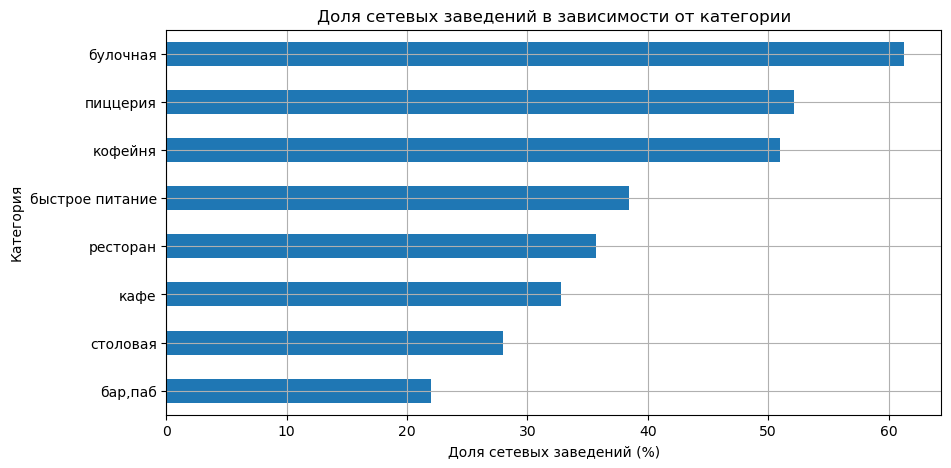

In [114]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Считаем долю сетевых заведений по каждой категории
category_chain_ratio = df.groupby('category')['chain'].mean() * 100

# Строим график
category_chain_ratio.sort_values().plot(
    kind='barh',
    title='Доля сетевых заведений в зависимости от категории',
    xlabel='Доля сетевых заведений (%)',
    ylabel='Категория',
    grid=True
)

# Отображаем график
plt.show()

Хоть больше всего сетевые заведения являются заведения категории кафе, из всех категорий, булочные лидируют по доле сетевых точек на несетевые (больше 60% булочных - сетевые). Можно сказать что булочные чаще оказываются сетевыми чем все остальные категории

### Анализ посадочных мест

Проведем исследование количества посадочных мест, будем использовать метод `describe`

In [119]:
# Выводим статистические показатели
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Как мы можем заметить, медиана (50-й процентиль - 75) и среднее арифметическое (108.4) сильно отличаются друг от дурга, также мы видим большую разницу между 75-м процентилем (140) и максимальным значением (1288). Это говорит о выбросах в данных, нам надо изучить аномальные значения и решить как с ними работать.

Давайте посмотрим на распределение значений внутри столбца `seats`, для этого построим *гистограмму*

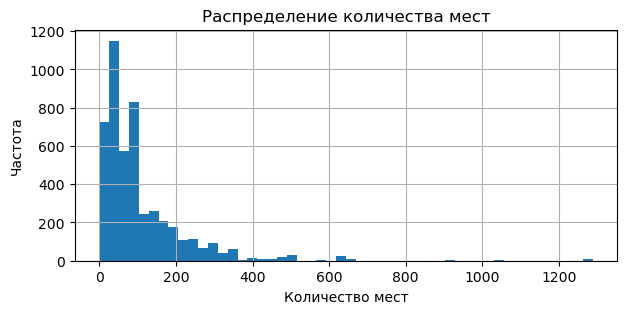

In [122]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Построим график столбчатой диаграммы
df['seats'].plot(
    kind = 'hist',
    title = f'Распределение количества мест',
    bins = 50,
    ylabel ='Частота',
    xlabel = 'Количество мест',
    rot = 0
)
plt.grid()

# Выводим график
plt.show()

Действительно, как видно на графике распределение значений очень сильно сдвинуто, мы видим длинный хвост в право. Следовательно, это данные с сильным правым смещением. Поскольку в данных нет категории типа "Банкетный зал" или "фудкорт" - эти значения говорят нам о выбросах, это аномальные значения которые помешают нам в дальнейшем анализе.

Рассмотрим аномалии детально, используя "Ящик с усами" `boxplot`

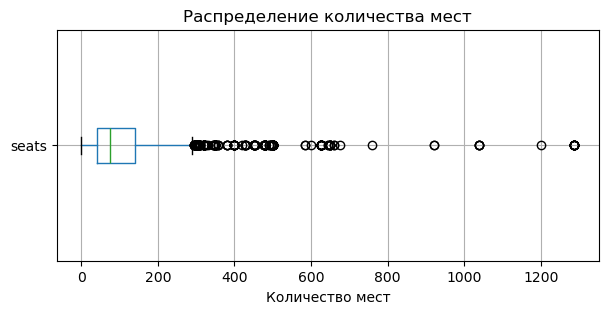

In [125]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Построим график столбчатой диаграммы
df.boxplot(column = 'seats', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества мест')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

Действительно, мы имеем дело с большим количеством выбросов, так как заранее известно что данные берутся из открытых источников или добавляются гостями, природа этих выбросов скорее всего - ошибка ручного ввода или техническая ошибка. 

Давайте нормализуем график и посмотрим на него без аномальных значений, для этого передадим значение `False` параметру `showfliers`:

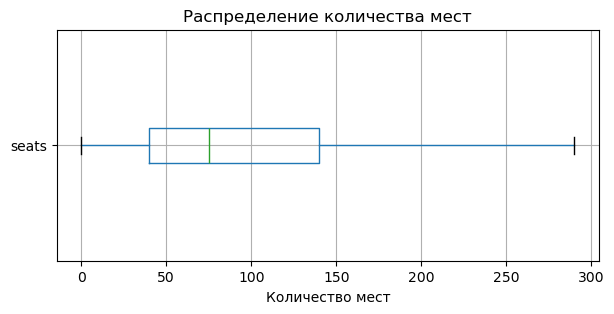

In [128]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Построим график столбчатой диаграммы
df.boxplot(column = 'seats', vert = False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества мест')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

Теперь мы четко видим медиану (75) и наблюдаемый максимум без учета аномалий ~275 - мы будем убирать значения выше этого чтобы не искажать дальнейший анализ

#### Количество посадочных мест в зависимости от категорий

Давайте рассмотрим медиану количества посадочных мест в зависимости от категории заведения чтобы ответить на вопрос - Какое количество посадочных мест типично для каждой категории?

In [133]:
# Сгруппируем данные по категории заведения
df[df['seats'] < 275].groupby('category')['seats'].median().sort_values(ascending = False)

category
ресторан           80.0
бар,паб            74.5
столовая           70.0
кофейня            67.0
быстрое питание    60.0
кафе               53.0
пиццерия           50.0
булочная           48.0
Name: seats, dtype: float64

По количеству посадочных мест лидируют рестораны (80 посадочных мест) и пабы (75 посадочных места). А наименьшее количество посадочных мест у булочных (48 посадочных мест) и пиццерий (50 посадочных мест)

Рассмотрим наглядно и построим столбчатую диаграмму:

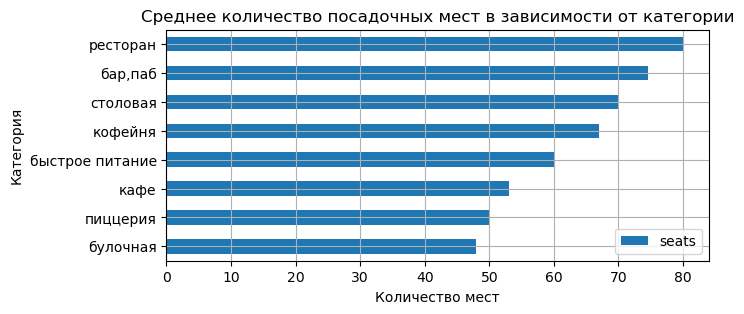

In [136]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Построим график столбчатой диаграммы
df[df['seats'] < 275].groupby('category')['seats'].median().sort_values().plot( 
    kind = 'barh',
    title = f'Среднее количество посадочных мест в зависимости от категории',
    legend = True,
    ylabel ='Категория',
    xlabel = 'Количество мест',
    rot = 0
)
plt.grid()

# Выводим график
plt.show()

Действительно, рестораны и пабы лидируют по количеству мест, а у булочных и пиццерий мест гораздо меньше - это объяснимо, так как обычно люди не задерживаются в таких местах, это будет либо перекус на ходу или доставка в случае с пиццериями, в отличие от ресторанов и баров где люди проводят больше времени.

### Анализ рейтингов заведения

Давайте рассмотрим столбец с рейтингами с помощью метода `describe` 

In [141]:
# Смотрим статистические показатели столбца с рейтингами 
df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Данные тут соответствуют описанию - рейтинги от 1 до 5, разница между средим (4.2) и медианой (4.3) минимальная, стандартное отклонение всего 0.47 - тут *нормальное распределие данных* без выбросов и аномальных значений

Аналогично с посадочными местами, давайте рассмотрим рейтинги в зависимости от категории заведений:

In [145]:
# Выводим средний рейтинг по категориям
df.groupby('category')['rating'].mean().sort_values(ascending = False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

Как мы видим, у баров (4.4), пиццерий (4.3) и ресторанов (4.3) в среднем рейтинг выше чем у других категорий, а вот у точек быстрого питание (4.0) и кафе (4.1) - ниже.

Рассмотрим на диаграмме:

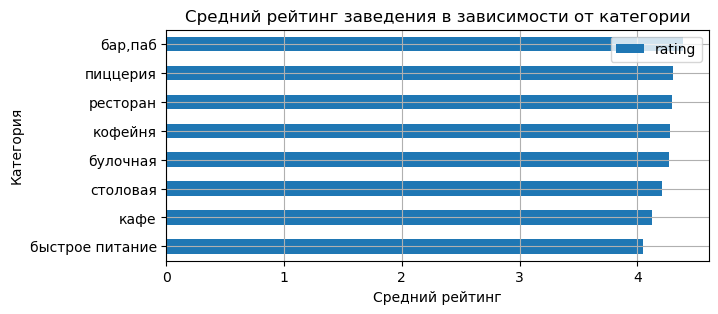

In [148]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Построим график столбчатой диаграммы
df.groupby('category')['rating'].mean().sort_values().plot( 
    kind = 'barh',
    title = f'Средний рейтинг заведения в зависимости от категории',
    legend = True,
    ylabel ='Категория',
    xlabel = 'Средний рейтинг',
    rot = 0
)
plt.grid()

# Выводим график
plt.show()

У всех категорий средний рейтинг в диапазоне от 4 до 4.4, они не сильно отличаются и в целом это хороший рейтинг - это может говорить нам о хорошем качестве заведений в Москве

### Анализ взаимосвязей между данными и рейтингом

Давайте рассмотрим все данные с точки зрения коэффицента корреляции с рейтингом, так мы можем выдвинуть гипотезы о причинности и ответить на вопрос, какое отношение имеют данные к рейтингу.

Чтобы понять, существует ли связь между данными, аналитики часто используют матрицы корреляции для признаков в данных. Для задачи важен столбец churn, поэтому будем изучать взаимосвязи данных в этом столбце с другими признаками. В Python существует универсальная библиотека phik, которая помогает изучать связи между данными разного типа, непрерывными и категориальными.

Библиотеку phik можно использовать для анализа связи между значением рейтинга и другими признаками. Они как раз представлены разными по природе данными: встречаются непрерывные значения, как количество мест, так и категории, например ценовая категория и административный округ.

Построим матрицу корреляций:

In [153]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['district', 'category', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()

# Выводим результат
display('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']


'Корреляционная матрица с коэффициентом phi_k для переменной rating'

,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


Нас интересует связь рейтинга заведения с другими данными, поэтому на экран был выведен только столбец `rating` итоговой матрицы корреляции `correlation_matrix`. Условие `correlation_matrix.loc[correlation_matrix.index != 'churn']` помогает убрать строку с индексом `'rating'`.

Наибольшая корреляция рейтинга наблюдается с данными о цене (0.22) и административном округе (0.20). Самая минимальная корреляция у рейтинга и количества посадочных мест.

Для наглядности визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn:

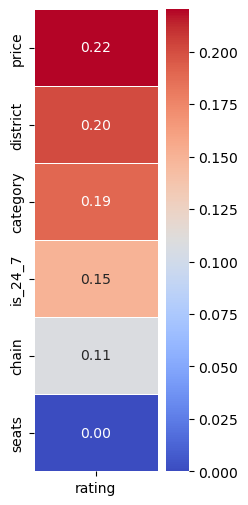

In [155]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(2, 6))

# Построим график heatmap с помощью библиотеки seaborn
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(
    data_heatmap,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm',
    linewidths=0.5
)

# Выводим график
plt.show()

Теперь корреляция между рейтингом и другими признаками наглядно отображена. Самая сильная взаимосвязь наблюдается между рейтингом и ценовой категорией, давайте проверим эту связь 


#### Проверка взаимосвязей между ценой и рейтингом

In [158]:
# Группируем данные для проверки взаимосвязей
df.groupby('price')['rating'].mean()

price
высокие          4.436611
выше среднего    4.386348
низкие           4.173077
средние          4.297874
Name: rating, dtype: float64

Давайте рассмотрим наглядно и построим график:

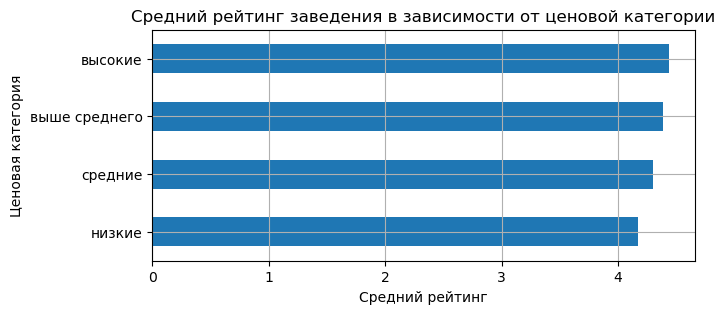

In [160]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Построим график столбчатой диаграммы
df.groupby('price')['rating'].mean().sort_values().plot( 
    kind = 'barh',
    title = f'Средний рейтинг заведения в зависимости от ценовой категории',
    legend = False,
    ylabel ='Ценовая категория',
    xlabel = 'Средний рейтинг',
    rot = 0
)
plt.grid()

# Выводим график
plt.show()

Действительно видно, что у цены и рейтинга есть положительная корреляция. Чем выше цена - тем выше и средний рейтинг.


### Топ-15 популярных сетей в Моксве

Для анализа популярности сетевых ресторанов в Москве, создадим новый датафрейм чтобы провести дальнейший анализ по нему 

In [164]:
# Выводим топ-15 заведений по популярности и средний рейтинг
top_15 = df[df['chain'] == 1].groupby(['name', 'category']).agg(name_count = ('name', 'count'), rating_mean = ('rating', 'mean')).sort_values(by = 'name_count', ascending = False).head(15).reset_index()

display('Топ-15 популярных сетей в Москве')
top_15

'Топ-15 популярных сетей в Москве'

,name,category,name_count,rating_mean
0,Шоколадница,кофейня,119,4.178151
1,Домино'с Пицца,пиццерия,76,4.169737
2,Додо Пицца,пиццерия,74,4.286486
3,One Price Coffee,кофейня,71,4.064789
4,Яндекс Лавка,ресторан,69,3.872464
5,Cofix,кофейня,65,4.075385
6,Prime,ресторан,49,4.114286
7,КОФЕПОРТ,кофейня,42,4.147619
8,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
9,Теремок,ресторан,36,4.105556


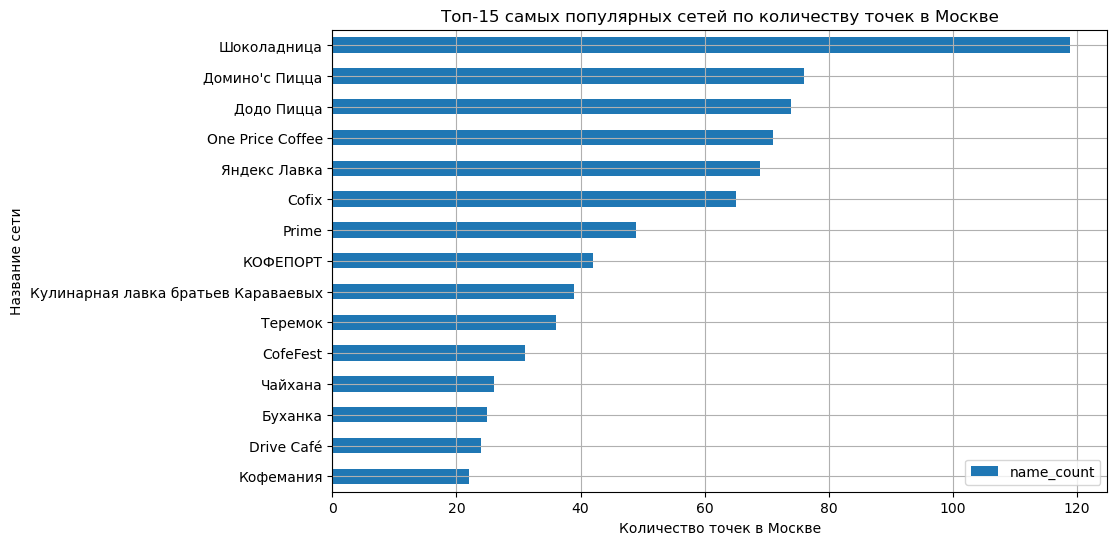

In [165]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Построим график столбчатой диаграммы
top_15.set_index('name')['name_count'].sort_values(ascending = True).plot( 
    kind = 'barh',
    title = f'Топ-15 самых популярных сетей по количеству точек в Москве',
    legend = True,
    ylabel ='Название сети',
    xlabel = 'Количество точек в Москве',
    rot = 0
)
plt.grid()

# Выводим график
plt.show()

Самая популярная сеть в Москве это "Шоколадница" с большим отрывом по количеству заведений - 119 точек

Давайте рассмотрим в разрезе по категориям, какая категория чаще встречается среди самых популярных сетевых заведений:

In [167]:
# Посмотрим какая категория самая частая среди самых популярных сетевых заведений
top_15.groupby('category').agg(category_count = ('category', 'count'), name_sum = ('name_count', 'sum')).sort_values(by = 'category_count', ascending = False)

,category_count,name_sum
category,,
кофейня,6,350
кафе,3,89
ресторан,3,154
пиццерия,2,150
булочная,1,25


Из 15 самых популярных сетей:
* 6 сетей являются кофейнями (всего 350 заведений)
* 3 сети - рестораны (154 заведения)
* 3 сети - кафе (89 заведений)
* 2 сети - пиццерии (150 заведений)
* 1 - булочная (25 заведений)

Давайте построим визуализацию 

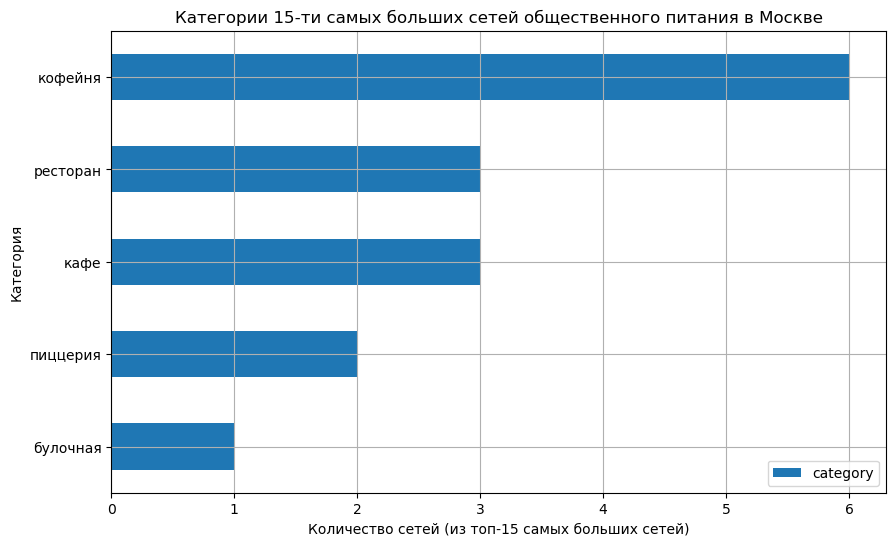

In [169]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Построим график столбчатой диаграммы
top_15.groupby('category')['category'].count().sort_values().plot( 
    kind = 'barh',
    title = f'Категории 15-ти самых больших сетей общественного питания в Москве',
    legend = True,
    ylabel ='Категория',
    xlabel = 'Количество сетей (из топ-15 самых больших сетей)',
    rot = 0
)
plt.grid()

# Выводим график
plt.show()

Самая популярная категория для наибольших сетей в Москве - Кофейня, а второе место поделено между ресторанами и кафе 

### Вариация среднего чека в зависимости от региона

Давайте рассмотрим столбец `middle_avg_bill` в котором хранятся средние чеки заведений и посмотрим, как меняется средний чек в зависимости от региона Москвы

In [173]:
# Посмотрим статистические данные по столбцу
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Мы видим что максимальное значение (35000) сильно отличается от 75-го перцентиля (1250) , а также медиана (750) отличается от среднего значения (958).

Скорее всего дело не в выбросах, а в премиальности заведения. Мы не можем судить о цене как об аномальном значении, это может быть средний чек премиального ресторана в центре Москвы.

Давайте рассмотрим средний чек в зависимости от округа Москвы:

In [175]:
# Группируем данные по округам
df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending = False)

district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64

Как мы видим исходя из данных, самый высокий средний чек в заведениях, которые расположены в Центральном административном округе Москвы - 1191 руб.

Самый маленький средний чек (654 руб.) в Юго-Восточном административном округе

Рассмотрим наглядно:

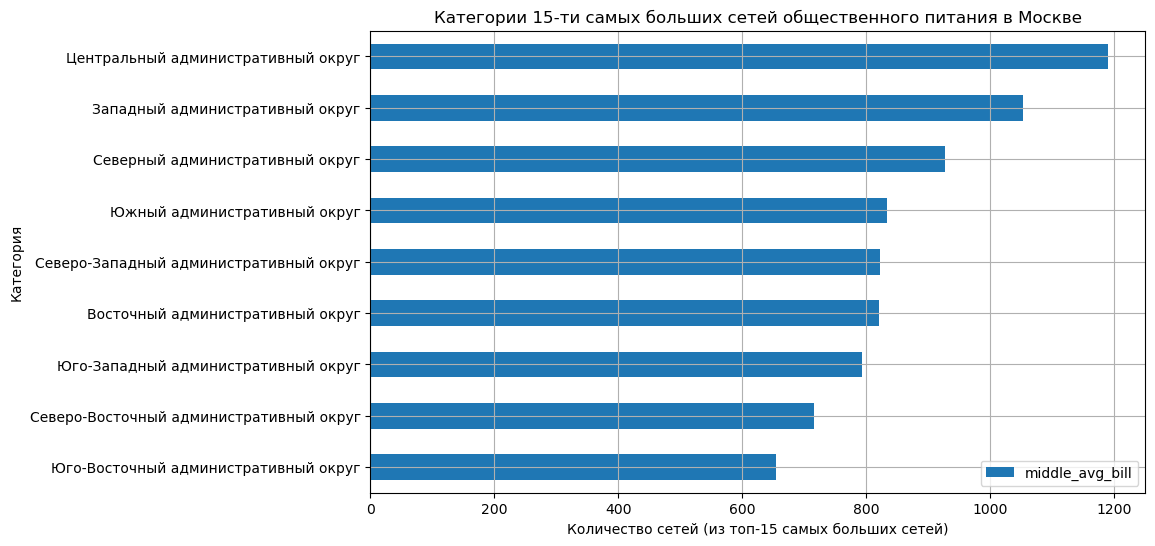

In [177]:

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Построим график столбчатой диаграммы
df.groupby('district')['middle_avg_bill'].mean().sort_values().plot( 
    kind = 'barh',
    title = f'Категории 15-ти самых больших сетей общественного питания в Москве',
    legend = True,
    ylabel ='Категория',
    xlabel = 'Количество сетей (из топ-15 самых больших сетей)',
    rot = 0
)
plt.grid()

# Выводим график
plt.show()

Действительно, Центральный административный округ обгоняет все остальные районы по среднему чеку, то есть в центре города больше дорогих заведений. То есть действительно - чем центральнее заведение, тем больше шансов что заведение будет с высоким средним чеком

Но поскольку остальные округа располагаются по кругу от Центрального округа - мы с точностью не можем сказать обратное - что чем дальше от центра - тем дешевле заведения. Для проверки этой гипотезы нам нужно больше данных, например - средний чек по районам Подмосковья

## Шаг 4. Итоговый вывод и рекомендации

#### Общий обзор проделанной работы

В ходе работы был проведён исследовательский анализ рынка заведений общественного питания в Москве. Данные из двух датасетов были объединены, очищены от пропусков и дубликатов, а также дополнены новыми признаками. Исследовано распределение заведений по категориям и районам, выявлено соотношение сетевых и несетевых объектов, проанализированы рейтинги, количество посадочных мест и средний чек. Особое внимание уделено влиянию расположения на ценовую политику.

#### Ответы на исследовательские вопросы 

В ходе анализа было выявлено, что всего за лето 2022 года было представлено 8 категорий заведений, чаще всего по всем данным встречаются: 
* Кафе (2378 заведений)
* Рестораны (2043 заведений)
* Кофейни (1413 заведений)

Однако в Центральном административном самая популярная категория это Ресторан (670 заведений)

Из всех представленных заведений 38% являются сетевыми - 3205 заведений и 62% являются несетевыми - 5201 заведение. Как среди сетевых так и несетевых, самая популярная категория - кафе (1599 среди несетевых и 779 сетевых). **Однако, булочные лидируют по доле сетевых точек на несетевые. Можно сказать что булочные чаще оказываются сетевыми чем все остальные категории. Больше 60% булочных являются сетевыми**

По количеству посадочных мест лидируют рестораны (80 посадочных мест) и пабы (75 посадочных места). А наименьшее количество посадочных мест у булочных (48 посадочных мест) и пиццерий (50 посадочных мест)

У всех категорий средний рейтинг в диапазоне от 4 до 4.4, они не сильно отличаются. 
У баров (4.4), пиццерий (4.3) и ресторанов (4.3) в среднем рейтинг выше чем у других категорий, а вот у точек быстрого питание (4.0) и кафе (4.1) - ниже.

Самая сильная связь в данных по рейтингу у ценовой категории. Мы выяснили что у этих двух значений положительная корреляция, то есть чем выше ценовая категория - тем выше и рейтинг заведения.


В топ-15 сетевых заведений по популярности (количеству точек) вошли такие заведения как:
1. Шоколадница
2. Домино'с Пицца
3. Додо Пицца
4. One Price Coffee
5. Яндекс Лавка
6. Cofix
7. Prime
8. КОФЕПОРТ
9. Кулинарная лавка братьев Караваевых
10. Теремок
11. CofeFest
12. Чайхана
13. Буханка
14. Drive Café
15. Кофемания

6 из них являются кофейнями и всего 1 из них - булочная

Самый высокий средний чек у Центрального административного района - 1191 руб. На втором месте Западный административный округ - 1053 руб.
Самый маленький средний чек у Юго-Восточного административного округа - 654 руб.

#### Рекомендации на основе анализа данных

Для успешного выхода на рынок общественного питания в Москве инвесторам стоит учитывать несколько ключевых факторов. Центральный административный округ привлекает заведения с более высоким средним чеком, что делает его перспективным местом для ресторанов и премиальных кафе. Однако конкуренция здесь особенно высока, и стоит обратить внимание на уникальность концепции. В спальных районах, таких как Юго-Восточный административный округ, средний чек ниже, но возможно большее количество посетителей за счёт доступности цен.

Сетевые заведения составляют 38% рынка, при этом наиболее распространённой категорией остаются кафе — как среди сетевых, так и несетевых заведений (1599 несетевых и 779 сетевых). Однако, булочные выделяются на фоне других категорий: более 60% из них являются сетевыми, что делает их лидерами по доле сетевых точек. Это говорит о том, что булочные чаще развиваются в формате сети, в отличие от кафе и ресторанов, где преобладают несетевые заведения.

Открытие сетевого проекта может быть выгодным, особенно в формате булочных и кофеен, которые демонстрируют устойчивый спрос и активно масштабируются. При этом рейтинг заведений положительно коррелирует с ценовой категорией, что подтверждает важность продуманного ценообразования и высокого уровня сервиса.

Количество посадочных мест варьируется в зависимости от формата заведения. Для ресторанов и пабов важно предусмотреть комфортное размещение гостей, тогда как для пиццерий и булочных можно ограничиться меньшим количеством посадочных мест, делая упор на удобство и скорость обслуживания.

На основе анализа можно рекомендовать несколько стратегий:

В премиальных районах Москвы, особенно в центре, выгодно открывать рестораны с высоким средним чеком, уникальным меню и качественным сервисом.
В спальных районах перспективны демократичные форматы кафе, пиццерий и точек быстрого питания, ориентированные на доступные цены и высокий трафик.
Открытие сети булочных и кофеен может быть особенно прибыльным, так как эти сегменты имеют высокий процент сетевых точек и продолжают активно развиваться.